# <br>
<br>
<center> <font size = "5"> Algorithmic Data Science Project </font></center>
<br>


<br>

---

## Overview
For this project, our goal involves examining the computational efficiency of veriety of algorithms desighned to identify similiarities between pairs of documents within a given collction. we have been given a matrix of data derived from excerpts of the novel "War and Peace" by Leo Tolstoy. Each column in the matrix contains the frequencies of words found in a document, and each row corresponds to an individual word.

This project includes five problems, each of which will be detailed in its respective section. The results will be individually discussed at the conclusion of the response to each question.

Firstly, All requirements have been imported.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import random
import pandas as pd
import time
import seaborn as sns
import timeit
from tqdm import tqdm
from multiprocessing import Pool
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Kings/data2023 (2).csv'
# reeding dataset
df = pd.read_csv(dataset)
# Display the entire DataFrame
print(df)

      Unnamed: 0  doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  ...  \
0              A     0     6     5     7     9    13    16    12    14  ...   
1           A-tu     0     0     0     0     0     0     0     0     0  ...   
2             A.     0     0     0     0     0     0     0     0     0  ...   
3            ABC     0     0     0     0     1     0     0     0     0  ...   
4            Aah     0     0     0     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
21150      états     0     0     0     0     0     0     0     0     0  ...   
21151   étranger     0     0     0     0     0     0     0     0     0  ...   
21152  évidence.     0     0     0     0     0     0     0     0     0  ...   
21153       êtes     0     0     0     0     0     0     0     0     0  ...   
21154       être     0     0     0     0     0     0     0     0     0  ...   

       doc11  doc12  doc13  doc14  doc15  doc16  do


#**Cosine Similarity**

In data analysis, cosine similarity is a way of measuring the similarity between two vectors. It is defined by dividing the dot product of the two vectors by the product of their lengths and therefore by definition it ranges from -1 and +1, with 0 indicating orthogonality or a 90-degree angle between the vectors. Conversely, a cosine similarity approaching 1 indicates a smaller angle between vectors, indicating increasing similarity. The formula for cosine similarity between vectors $A$ and $B$ is given by:

$\cos\theta = \cfrac{A\cdot B}{\vert{ A}\vert \cdot \vert{ B}\vert}$

where $\vert{ A}\vert$ and $\vert{ B}\vert$ are the vectors' lengths.
Now we want to analyze the running time of cosine similarity using two methods. To achieve this goal, I will go through the code step by step and explain each part.

 Two below functions that I have provided both calculate the cosine similarity between two vectors, vec1 and vec2, but they differ slightly in the way they are implemented.

In [ ]:
def cosine_similarity_np(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

"cosine_similarity_np" is a function that uses NumPy library to calculate the cosine similarity between two vectors named as vec1 and vec2. According to the definition of cosine similarity, we first calculate the dot product of the two vectors which is **"np.dot(vec1, vec2)"** and then divide it by each vector's length which are **"np.linalg.norm(vec1)"** and **"np.linalg.norm(vec2)"** respectively.

In [ ]:
def cosine_similarity_custom(vec1, vec2):
    dot_product = sum(x * y for x, y in zip(vec1, vec2))
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

I created a function named **cosine_similarity_custom** which computes the dot product manually using a for loop and the zip function. Norms are determined using the same approach as in the previous method. Ultimately, this function returns the cosine similarity.

 **Data Preparation**

The following two code blocks are designed to create a list of document names and build a dictionary that stores the token count for each document respectively.

In [ ]:
documents_list = df.columns.tolist()[1:]
print(documents_list)

['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8', 'doc9', 'doc10', 'doc11', 'doc12', 'doc13', 'doc14', 'doc15', 'doc16', 'doc17', 'doc18', 'doc19', 'doc20']


In [ ]:
# Calculate length of documents

document_lenth_doc = {}

for doc in documents_list:
  document_lenth_doc[doc] = df[doc].sum()
document_lenth_doc

{'doc1': 8303,
 'doc2': 8290,
 'doc3': 7765,
 'doc4': 8216,
 'doc5': 17630,
 'doc6': 15450,
 'doc7': 17028,
 'doc8': 18470,
 'doc9': 26527,
 'doc10': 25792,
 'doc11': 26269,
 'doc12': 26667,
 'doc13': 35410,
 'doc14': 34149,
 'doc15': 36962,
 'doc16': 35463,
 'doc17': 44426,
 'doc18': 43989,
 'doc19': 44894,
 'doc20': 43104}

In [ ]:
# Select parts of documents to create some test documents
gen_documents_lenth_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

gen_documents_list = []

for item in gen_documents_lenth_list:
  random_num_1 = random.randint(0, 19)

  while True:
      random_num_2 = random.randint(0, 19)
      if random_num_2 != random_num_1:
          break

  gen_documents_list.append((df[documents_list[random_num_1]][0:item], df[documents_list[random_num_2]][0:item]))

The following code block generates pairs of document slices from random columns in a pandas DataFrame.

In [ ]:
def calculate_cos_similarity(vec1, vec2):
    vec1 = np.asarray(vec1)
    vec2 = np.asarray(vec2)
    def np_cos_sim():
        return cosine_similarity_np(vec1, vec2)

    def custom_cos_sim():
        return cosine_similarity_custom(vec1, vec2)
    iterations = 1000

    np_time = timeit.timeit(np_cos_sim, number=iterations)
    custom_time = timeit.timeit(custom_cos_sim, number=iterations)

    return np_time, custom_time

Here, the **"timeit.timeit"** function is defined to measure the execution time of each cosine similarity method which were mentioned above. The **iteration** variable is set to 1000 which is the number of times each cosine similarity methods will be executed for timing measurement.

In [ ]:
np_custom_pairs = []
docs_name_pairs = []
for pair_doc in tqdm(gen_documents_list):
  vector_1 = pair_doc[0]
  vector_2 = pair_doc[1]
  re_np_time, re_custom_time = calculate_cos_similarity(vector_1, vector_2)
  np_custom_pairs.append((re_np_time, re_custom_time))
print(np_custom_pairs)

100%|██████████| 8/8 [00:12<00:00,  1.61s/it]

[(0.02110415200013449, 0.2890382979999231), (0.021315151000180776, 0.7218782349998492), (0.024326211000015974, 0.8868762170000082), (0.044418736000125136, 1.1298994240000866), (0.03388302600001225, 1.3971659420001288), (0.04041962500014051, 1.692192736999914), (0.03850357500004975, 2.177378168000132), (0.06907668600001671, 4.283726566000041)]


(**np_custom_pairs**) is a list of tuples where each tuple contains the execution time for two cosine similarity methods for a specific document pair.

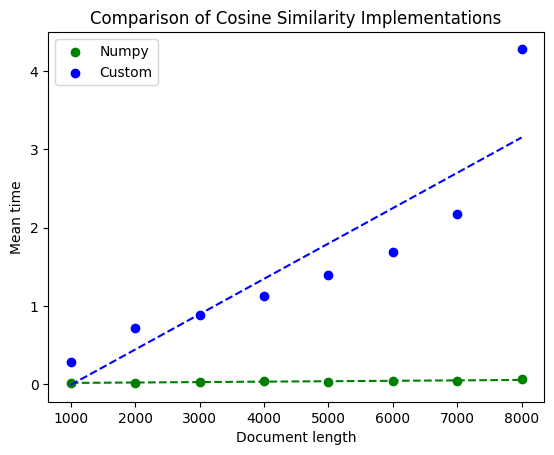

In [ ]:
y_values = np_custom_pairs
x_values = gen_documents_lenth_list

y_numpy = np.array([y[0] for y in y_values])
y_custom = np.array([y[1] for y in y_values])

fit_first = np.polyfit(x_values, y_numpy, 1)
fit_fn_first = np.poly1d(fit_first)

fit_second = np.polyfit(x_values, y_custom, 1)
fit_fn_second = np.poly1d(fit_second)

plt.scatter(x_values, y_numpy, color='green', label='Numpy')
plt.plot(x_values, fit_fn_first(x_values), color='green', linestyle='--')

plt.scatter(x_values, y_custom, color='blue', label='Custom')
plt.plot(x_values, fit_fn_second(x_values), color='blue', linestyle='--')

plt.xlabel('Document length')
plt.ylabel('Mean time')
plt.title('Comparison of Cosine Similarity Implementations')
plt.legend()
plt.show()


**Result**

The graph provides a comparative analysis of the efficiency, specifically focusing on the average computation time, between two implementations of cosine similarity methods. In conclusion, the implementation utilizing the NumPy library proves to be more efficient in terms of computation time, particularly noticeable as the length of the documents increases. This enhanced efficiency makes the NumPy-based method the preferred option for applications that involve calculating cosine similarity, especially in the context of large datasets.

**Time Complexity**

Time complexity is the measurement of the amount of time that an algorithm takes to complete as a function of the size of its input. We can use "log scaling" in the context of time complexity to represent and analyze time complexity graphs or plots. In this way we are able to compare the efficiency of algorithms in terms of their running time.
Based on graphs, it is apperant that the time complexity remains O(n) that means the running time grows linearly with the input size. If an algorithm has a time complexity of O(n) it implies that the time it takes to execute the algorithm increases linearly with its input size growing.[1]

Numpy Slope:0.4939953227977437  Numpy Constant:0.0005816193306487343


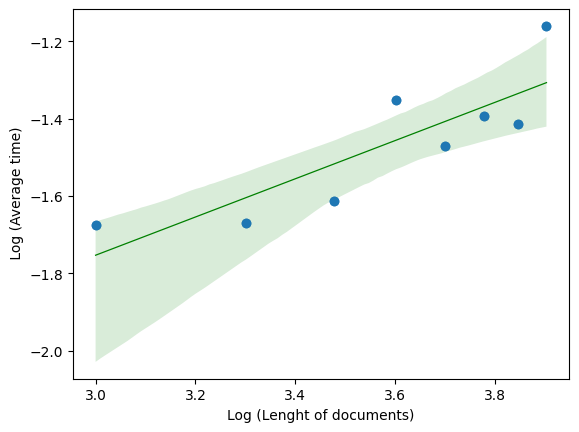

In [ ]:
# Calculating Constant and Slope for Numpy

x_axis_log = [np.log10(i) for i in x_values]
y_axis_log = [np.log10(i) for i in y_numpy]
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)

slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)

print("Numpy Slope:{}  Numpy Constant:{}".format(slope, constant))

Custom Slope:1.0988403214318139  Custom Constant:0.00014251465437663054


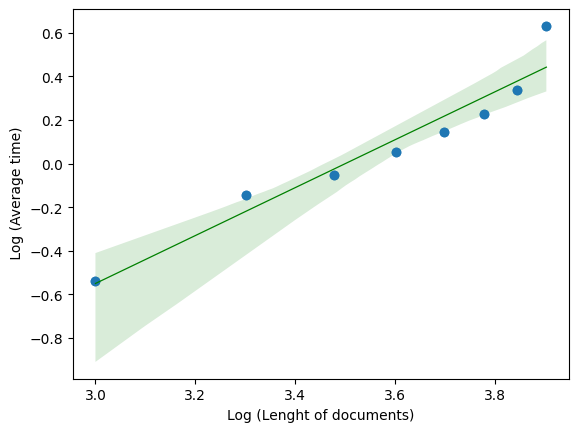

In [ ]:
# Calculating Constant and Slope for Custom

x_axis_log = [np.log10(i) for i in x_values]
y_axis_log = [np.log10(i) for i in y_custom]
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)

slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)

print("Custom Slope:{}  Custom Constant:{}".format(slope, constant))

**Result**

As we know the key constant is the slope of the linear regression of execution time against the size of the data.
It is apparent from the two above figures that the constant of cosine similarity method by using NumPy is $5.6*10^{-4}$ and for the other method is $5.8*10^{-4}$. We should note that the key constant is not the whole story and is just a part of the overall time complexity (O(n)).

# **Jaccard Similarity**
Jaccard Similarity is a way for finding the similarity between two sets. The formula for Jaccard similarity is:

$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

therefore it ranges from 0 to 1, where 0 indicates there is no similarity and 1 represents that the sets are identical.

In [ ]:
# Preparation data as an input for Question 2
def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

I developed two functions to compute the Jaccard similarity, both aimed at calculating this metric between two dictionaries that represent sets. While their objectives are identical, these functions differ in their implementation specifics and efficiency levels.

In [ ]:
# Basic Implementation
def jaccard(dict_1, dict_2):
    intersection = {}
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item] = min(dict_1[item],dict_2[item])

    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    return intersectiontot/union

In [ ]:
# NumPy Implementation
def jaccard_my_implementation_numpy(dict_1, dict_2):
    dict_keys = list(set(dict_1.keys()) | set(dict_2.keys()))
    vec1 = np.array([dict_1.get(key, 0) for key in dict_keys])
    vec2 = np.array([dict_2.get(key, 0) for key in dict_keys])

    intersection = np.minimum(vec1, vec2).sum()
    union = vec1.sum() + vec2.sum() - intersection

    return intersection / union if union != 0 else 0

Preparation of dataset to calculate the Jaccard Similarity methods.

In [ ]:
all_words = df.iloc[:, 0]
all_bags = {}

for doc_lenth in gen_documents_lenth_list:
  bags = []
  for doc in documents_list:
      doc_bag = {}
      for token_idx, token_count in enumerate(df[doc][0:doc_lenth]):
          if token_count == 0:
            continue
          else:
            doc_bag[all_words[token_idx].lower()] = token_count
      bags.append(doc_bag)
  all_bags[str(doc_lenth)] = bags


Measuring the execution time for Jaccard similiraty functions.

In [ ]:
def time_calculation(doc1, doc2):
    start = time.time()
    _ = jaccard(doc1, doc1)
    end = time.time()
    return end - start

In [ ]:
def time_calculation_me(doc1, doc2):
    start = time.time()
    _ = jaccard_my_implementation_numpy(doc1, doc1)
    end = time.time()
    return end - start

In [ ]:
iterations = 1000

# Calculating average time for the 'jaccard' function
avg_time_computer = []
for doc_length in gen_documents_lenth_list:
  length_time = []
  for i in range(0, iterations):
    rand_idx_1 = random.randint(0, 19)
    rand_idx_2 = random.randint(0, 19)
    length_time.append(time_calculation(all_bags[str(doc_length)][rand_idx_1],
                       all_bags[str(doc_length)][rand_idx_2]))
  avg_time_computer.append(np.mean(length_time))

# Calculating average time for the 'jaccard_my_implementation_numpy' function
avg_time_my_implementation = []
for doc_length in gen_documents_lenth_list:
  length_time = []
  for i in range(0, iterations):
    rand_idx_1 = random.randint(0, 19)
    rand_idx_2 = random.randint(0, 19)
    length_time.append(time_calculation_me(all_bags[str(doc_length)][rand_idx_1],
                       all_bags[str(doc_length)][rand_idx_2]))
  avg_time_my_implementation.append(np.mean(length_time))

print(avg_time_computer)
print(avg_time_my_implementation)

[8.284783363342285e-05, 0.0001671154499053955, 0.00024727392196655275, 0.0003527688980102539, 0.00047684359550476075, 0.0005802452564239502, 0.00069500732421875, 0.0008201370239257812]
[8.325409889221191e-05, 0.000261711597442627, 0.0004227678775787354, 0.0006342072486877441, 0.0008027386665344238, 0.0009784774780273438, 0.0011879286766052245, 0.0014597470760345458]


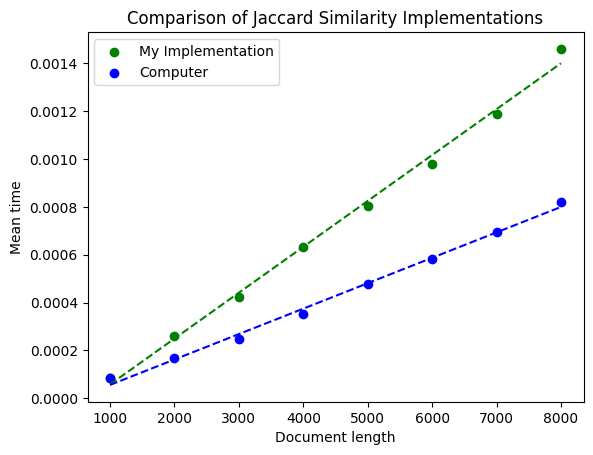

In [ ]:
x_values = gen_documents_lenth_list

fit_first = np.polyfit(x_values, avg_time_my_implementation, 1)
fit_fn_first = np.poly1d(fit_first)

fit_second = np.polyfit(x_values, avg_time_computer, 1)
fit_fn_second = np.poly1d(fit_second)

plt.scatter(x_values, avg_time_my_implementation, color='green', label='My Implementation')
plt.plot(x_values, fit_fn_first(x_values), color='green', linestyle='--')

plt.scatter(x_values, avg_time_computer, color='blue', label='Computer')
plt.plot(x_values, fit_fn_second(x_values), color='blue', linestyle='--')

plt.xlabel('Document length')
plt.ylabel('Mean time')
plt.title('Comparison of Jaccard Similarity Implementations')
plt.legend()
plt.show()


**Result**


Based on the graph, the second implementation (**jaccard_my_implementation_numpy function**) that utilizes NumPy arrays can be more efficient, especially for large dictionaries. As you can see, as document length increases, the efficiency of this method increases and it is executed in less time.

My Implementation Slope:1.336911751881087  My Implementation Constant:9.061754184981158e-09


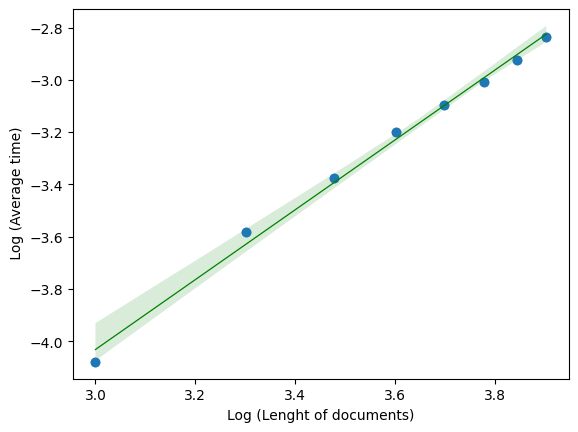

In [ ]:
x_axis_log = [np.log10(i) for i in x_values]
y_axis_log = [np.log10(i) for i in avg_time_my_implementation]
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)

slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)

print("My Implementation Slope:{}  My Implementation Constant:{}".format(slope, constant))

My Implementation Slope:1.1110205413961236  My Implementation Constant:3.650174293486384e-08


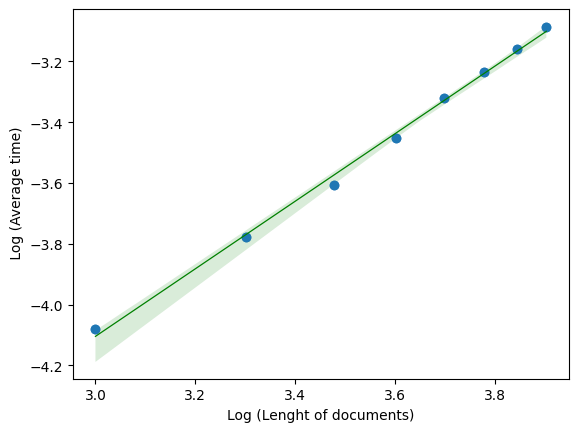

In [ ]:
x_axis_log = [np.log10(i) for i in x_values]
y_axis_log = [np.log10(i) for i in avg_time_computer]
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)

slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)

print("My Implementation Slope:{}  My Implementation Constant:{}".format(slope, constant))

**Result**

The diagrams above illustrate that I've applied a logarithmic scaling to enhance their readability. As previously noted, the slope of the line representing **My Implementation** is less steep compared to that of the **Computer Implementation**. The differences in the slopes, along with key constants, clearly demonstrate the faster performance of **My Implementation**.

More the constant of Jaccard similarity method by using NumPy is $9.06*10^{-9}$ and for the other method is $3.65*10^{-8}$.

Now we want to analyze the theoretical **worst-case running time** for both cosine and Jaccard similarities.

Preparation of dataset for Jaccard similarity

In [ ]:
# Creating a list of dictionaries from a DataFrame
def list_of_dic(df):
    return [
        {df.loc[index, col]:index  for index in df.index if df.loc[index, col] != 0}
        for col in df.columns
    ]

w = list_of_dic(df)
print(w)

[{'A': 0, 'A-tu': 1, 'A.': 2, 'ABC': 3, 'Aah': 4, 'Abashed': 5, 'Abbé': 6, 'About': 7, 'Above': 8, 'Abroad': 9, 'Abrámovna': 10, 'Absolute': 11, 'Academy': 12, 'According': 13, 'Achilles': 14, 'Achtung': 15, 'Across': 16, 'Acts': 17, 'Adam': 18, 'Adieu': 19, 'Adjutant': 20, 'Adjutant-General': 21, 'Adjutants': 22, 'Admirable': 23, 'Admit': 24, 'Admitting': 25, 'Adonai': 26, 'Adorable': 27, 'Adored': 28, 'Adráksin': 29, 'Advisers': 30, 'Affairs': 31, 'Afraid': 32, 'Africa': 33, 'After': 34, 'Afterwards': 35, 'Again': 36, 'Against': 37, 'Agitated': 38, 'Agraféna': 39, 'Ah': 40, 'Ahead': 41, 'Aide-de-camp': 42, 'Akhrosímova': 43, 'Akhárovs': 44, 'Akínfi': 45, 'Alarmed': 46, 'Albanians': 47, 'Alexander': 48, 'Alexanders—Bekleshëv': 49, 'Alexander—generals': 50, 'Alexander—just': 51, 'Alexander—though': 52, 'Alexandre': 53, 'Alexéevich': 54, 'Alexéy': 55, 'Aliment': 56, 'Aline': 57, 'All': 58, 'Alley': 59, 'Allez-vous': 60, 'Alliance': 61, 'Allies': 62, 'Allow': 63, 'Almighty': 64, 'Almost'

Measuring the worst-case running time of Jaccard similarity for different lengths of documents

In [ ]:
def runtime(docs):
  for d1 in docs:
      for d2 in docs:
          jaccard(d1, d2)
  return None

In [ ]:

x_jaccard = []
y_jaccard = []

for n in range(5, len(w)):
    x_jaccard.append(n)
    start = time.time()
    runtime(w[0:n+1])
    end = time.time()
    duration = end - start
    avg_time = duration / (len(w) * (len(w) - 1) / 2)  # Calculate average time
    y_jaccard.append(avg_time)

# Now, 'xs' contains the values of 'n', and 'y_jaccard' contains the corresponding average times
print(x_jaccard)
print(y_jaccard)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.0005329461324782599, 0.0005197899682181222, 0.0005530584426153274, 0.0006383623395647322, 0.0006797359103248233, 0.0007856948035103934, 0.0008832125436692011, 0.000951083501180013, 0.000982922599429176, 0.0010759035746256511, 0.0011051155271984282, 0.0012449446178617932, 0.0012415942691621326, 0.001420872552054269, 0.0014667692638578869, 0.0016078506197248186]


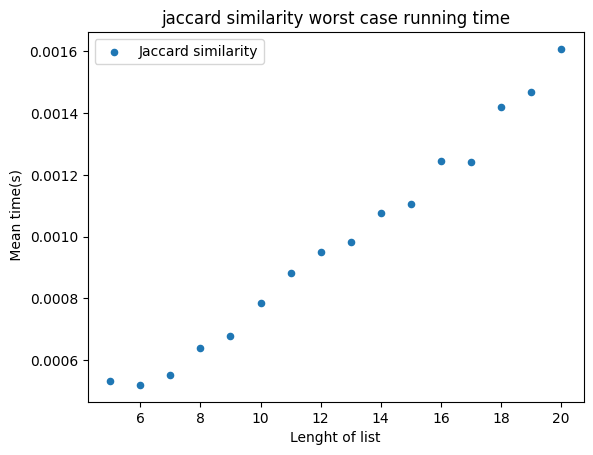

In [ ]:
plt.scatter(x_jaccard,y_jaccard, label='Jaccard similarity',s=20)
plt.title('jaccard similarity worst case running time')
plt.xlabel('Lenght of list')
plt.ylabel(' Mean time(s)')
plt.legend(loc='upper left')
plt.show()

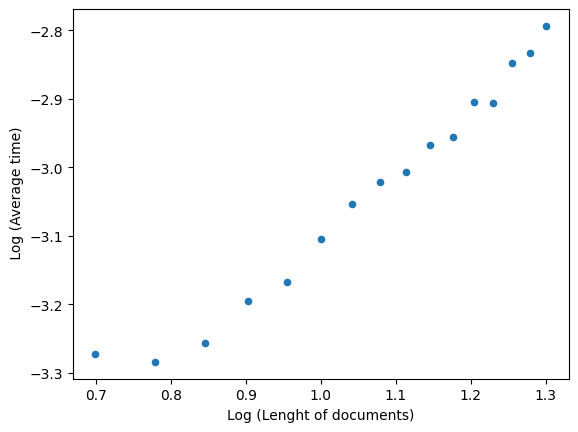

My Implementation Slope:0.8641633929863821  My Implementation Constant:0.00011105056511341631


In [ ]:
# Converting data to logarithmic scale to have a better visualization
x_axis_log=[np.log10(i) for i in x_jaccard]
y_axis_log=[np.log10(i) for i in y_jaccard]

plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)
plt.scatter(x_axis_log, y_axis_log, label='Jaccard similarity',s=20)
slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)
plt.show()
print("My Implementation Slope:{}  My Implementation Constant:{}".format(slope, constant))

Preparation of dataset for cosine similarity

In [ ]:
# Creating a list of dictionaries from pairs of documents
def list_of_dic(df):
    return [
        {index:df.loc[index, col] for index in df.index if df.loc[index, col] != 0}
        for col in df.columns
    ]

w = list_of_dic(df)
print(w)

[{0: 'A', 1: 'A-tu', 2: 'A.', 3: 'ABC', 4: 'Aah', 5: 'Abashed', 6: 'Abbé', 7: 'About', 8: 'Above', 9: 'Abroad', 10: 'Abrámovna', 11: 'Absolute', 12: 'Academy', 13: 'According', 14: 'Achilles', 15: 'Achtung', 16: 'Across', 17: 'Acts', 18: 'Adam', 19: 'Adieu', 20: 'Adjutant', 21: 'Adjutant-General', 22: 'Adjutants', 23: 'Admirable', 24: 'Admit', 25: 'Admitting', 26: 'Adonai', 27: 'Adorable', 28: 'Adored', 29: 'Adráksin', 30: 'Advisers', 31: 'Affairs', 32: 'Afraid', 33: 'Africa', 34: 'After', 35: 'Afterwards', 36: 'Again', 37: 'Against', 38: 'Agitated', 39: 'Agraféna', 40: 'Ah', 41: 'Ahead', 42: 'Aide-de-camp', 43: 'Akhrosímova', 44: 'Akhárovs', 45: 'Akínfi', 46: 'Alarmed', 47: 'Albanians', 48: 'Alexander', 49: 'Alexanders—Bekleshëv', 50: 'Alexander—generals', 51: 'Alexander—just', 52: 'Alexander—though', 53: 'Alexandre', 54: 'Alexéevich', 55: 'Alexéy', 56: 'Aliment', 57: 'Aline', 58: 'All', 59: 'Alley', 60: 'Allez-vous', 61: 'Alliance', 62: 'Allies', 63: 'Allow', 64: 'Almighty', 65: 'Alm

Measuring the worst-case running time of cosine similarity for different lengths of documents

In [ ]:
def runtime(docs):
  for d1 in docs:
      for d2 in docs:
        cosine_similarity_custom(d1, d2)
  return None

In [ ]:
x_cos = []
y_cos = []
w = []
for pair in gen_documents_list[2:]:
  w.append(pair[0][0:1000])
  w.append(pair[1][0:1000])
  w.append(pair[0][1000:2000])
  w.append(pair[1][1000:2000])

for n in range(5, len(w)):
    x_cos.append(n)
    start = time.time()
    runtime(w[0:n])
    end = time.time()
    duration = end - start
    avg_time = duration / (len(w) * (len(w) - 1) / 2)  # Calculate average time
    y_cos.append(avg_time)

# Now, 'xs' contains the values of 'n', and 'y_jaccard' contains the corresponding average times
print(x_cos)
print(y_cos)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[9.94093176247417e-05, 8.149337077486342e-05, 9.947151377581167e-05, 0.00013003141983695653, 0.00016375037207119706, 0.0002155649489250736, 0.000249388425246529, 0.000332068705904311, 0.00039011326389036316, 0.0004185058068538058, 0.0005141600318576978, 0.0006031584048616713, 0.0006179256715636322, 0.001309132230454597, 0.0007897313090338223, 0.000890131445898526, 0.0009798010190327962, 0.001016316206558891, 0.0011766371519669242]


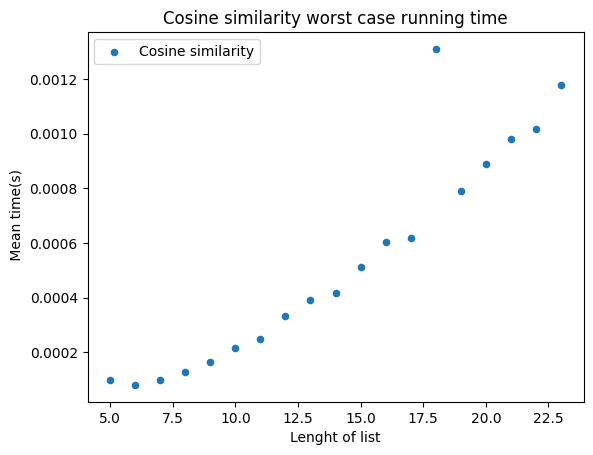

In [ ]:
plt.scatter(x_cos,y_cos, label='Cosine similarity',s=20)
plt.title('Cosine similarity worst case running time')
plt.xlabel('Lenght of list')
plt.ylabel(' Mean time(s)')
plt.legend(loc='upper left')
plt.show()

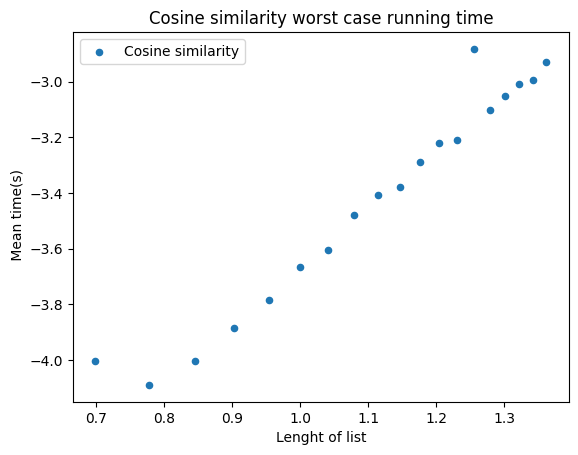

My Implementation Slope:1.9357458497373545  My Implementation Constant:2.734635881719222e-06


In [ ]:
# Converting data to logarithmic scale to have a better visualization
x_cos = [np.log10(i) for i in x_cos]
y_cos = [np.log10(i) for i in y_cos]

plt.title('Cosine similarity worst case running time')
plt.xlabel('Lenght of list')
plt.ylabel(' Mean time(s)')
r = stats.linregress(x_cos, y_cos)
plt.scatter(x_cos, y_cos, label='Cosine similarity',s=20)
slope, intercept, _, _, _ = stats.linregress(x_cos, y_cos)
constant = np.power(10, intercept)
plt.legend(loc='upper left')
plt.show()
print("My Implementation Slope:{}  My Implementation Constant:{}".format(slope, constant))

**Result**


In the first part, we measured the mean time it took to compare subsets of documents or Jaccard similarity's worst-case scenario. The plot shows how the mean time changes with the increasing length of documents. Then we transformed the data to a logarithmic scale for better visualization. The key constant is $1.1*10^{-4}$.

In the second part of question, we did the same analysis for the cosine similarity. The key constant is $2.7*10^{-6}$.

Now we want to write a function that implements all-pairs similarities for Jaccard similarity using Python's multiprocessing.

In [ ]:
def maketotal(dict1):
    total = 0
    for item in dict1:
        total += dict1[item]
    return total

**jaccard_parallel function** calculates Jaccard similarity between two dictionaries

In [ ]:
def jaccard_parallel(dict_1, dict_2):
    intersection = {}
    for item in dict_1.keys():
        if item in dict_2.keys():
            intersection[item] = min(dict_1[item], dict_2[item])

    intersectiontot = maketotal(intersection)
    union = maketotal(dict_1) + maketotal(dict_2) - intersectiontot
    return intersectiontot / union if union != 0 else 0

**jaccard_worker function** applies Jaccard similarity computation to a pair of dictionaries

In [ ]:
def jaccard_worker(pair):
    dict_1, dict_2 = pair
    return jaccard_parallel(dict_1, dict_2)

**parallel_jaccard_computations function** performs parallel Jaccard similarity computations for a list of document pairs

In [ ]:
def parallel_jaccard_computations(doc_pairs, pool_size):
    with Pool(pool_size) as pool:
        results = pool.map(jaccard_worker, [doc_pairs] * pool_size)
        pool.close()
    return results


**time_calculation function** measures the time taken for parallel Jaccard similarity computations

In [ ]:
def time_calculation(doc1, doc2):
    start = time.time()
    _ = parallel_jaccard_computations((doc1, doc2), 2)
    end = time.time()
    return end - start

In [ ]:
iterations = 10
avg_time_parallel = []
for doc_length in gen_documents_lenth_list:
  length_time = []
  for i in range(0, iterations):
    rand_idx_1 = random.randint(0, 19)
    rand_idx_2 = random.randint(0, 19)
    length_time.append(time_calculation(all_bags[str(doc_length)][rand_idx_1],
                       all_bags[str(doc_length)][rand_idx_2]))
  avg_time_parallel.append(np.mean(length_time))

print(avg_time_parallel)

[0.12369325160980224, 0.14566948413848876, 0.10840544700622559, 0.088539457321167, 0.09395785331726074, 0.07361345291137696, 0.08598806858062744, 0.09134488105773926]


Text(0, 0.5, 'Average time')

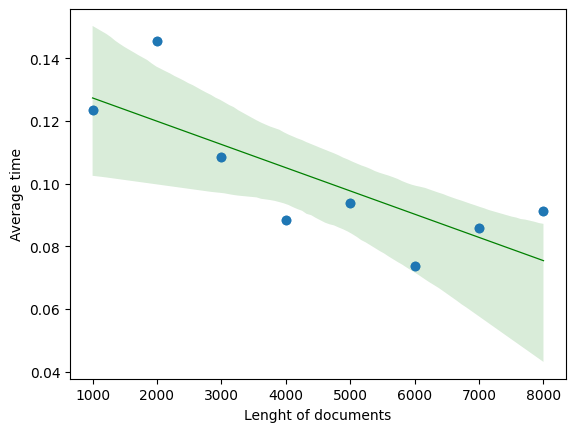

In [ ]:
x_axis_log = x_values
y_axis_log = avg_time_parallel
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Lenght of documents')
plt.ylabel('Average time')

My Implementation Slope:-0.250586412599431  My Implementation Constant:0.7809689189503538


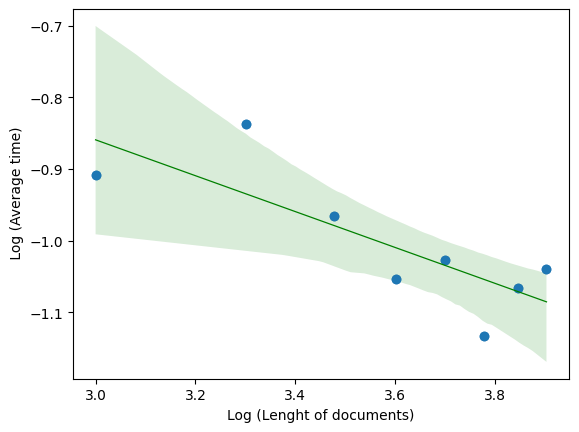

In [ ]:
x_axis_log = [np.log10(i) for i in x_values]
y_axis_log = [np.log10(i) for i in avg_time_parallel]
ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.scatter(x_axis_log, y_axis_log)
plt.xlabel('Log (Lenght of documents)')
plt.ylabel(' Log (Average time)')
r = stats.linregress(x_axis_log, y_axis_log)

slope, intercept, _, _, _ = stats.linregress(x_axis_log, y_axis_log)
constant = np.power(10, intercept)

print("My Implementation Slope:{}  My Implementation Constant:{}".format(slope, constant))

In [ ]:
def time_calculation_diff_pool_size(doc1, doc2, pool_size):
    start = time.time()
    _ = parallel_jaccard_computations((doc1, doc2), pool_size)
    end = time.time()
    return end - start

In [ ]:
iterations = 10
avg_time_parallel_proccessors = []
number_of_processors = [2, 4, 8, 16, 32, 64]

# Iterating over different numbers of processors
for num in tqdm(number_of_processors):
  length_time = []

  # Performing timing analysis for multiple iterations
  for i in range(0, iterations):
    length_time.append(time_calculation_diff_pool_size(all_bags[str(8000)][1],
                       all_bags[str(8000)][2], num))

  # Calculating the average time for the current number of processors
  avg_time_parallel_proccessors.append(np.mean(length_time))

print(avg_time_parallel_proccessors)

100%|██████████| 6/6 [00:47<00:00,  7.84s/it]

[0.06847825050354003, 0.13580288887023925, 0.4111288070678711, 0.5855103731155396, 1.2639259338378905, 2.235200047492981]


Text(0, 0.5, 'Average time')

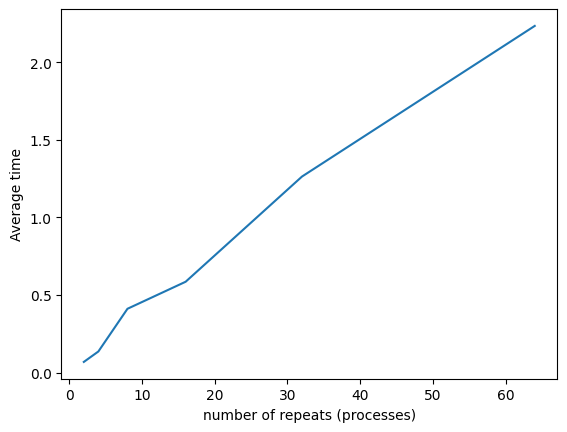

In [ ]:
x_axis_log = x_values
y_axis_log = avg_time_parallel
#ax = sns.regplot(x=x_axis_log, y=y_axis_log, line_kws={"color":"g","alpha":1,"lw":0.9})
plt.plot(number_of_processors, avg_time_parallel_proccessors)
plt.xlabel('number of repeats (processes)')
plt.ylabel('Average time')

In [ ]:
iterations = 20

avg_all = []
avg_length = []
number_of_processors = [2, 4, 8, 16, 32, 64]
for num in tqdm(number_of_processors):
  avg_time_parallel = []
  for doc_length in gen_documents_lenth_list:
    length_time = []
    for i in range(0, iterations):
      rand_idx_1 = random.randint(0, 19)
      rand_idx_2 = random.randint(0, 19)
      length_time.append(time_calculation(all_bags[str(doc_length)][rand_idx_1],
                        all_bags[str(doc_length)][rand_idx_2]))
    avg_time_parallel.append(np.mean(length_time))
  avg_all.append(np.mean(avg_time_parallel))

print(avg_all)

100%|██████████| 6/6 [01:23<00:00, 13.92s/it]

[0.09367068111896515, 0.08755251616239548, 0.08781366646289826, 0.08696677833795546, 0.08312258720397948, 0.08237162232398987]


Text(0, 0.5, 'Average time')

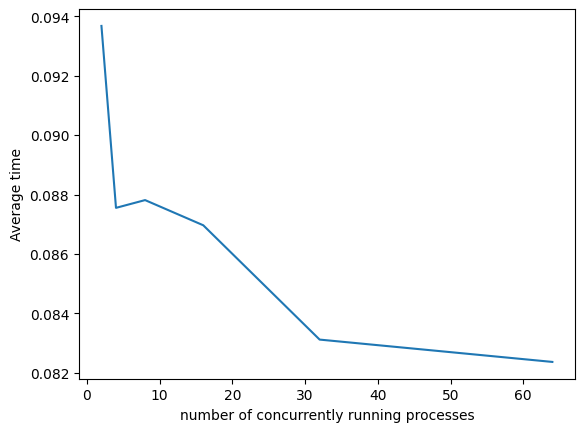

In [ ]:
plt.plot(number_of_processors, avg_all)
plt.xlabel('number of concurrently running processes')
plt.ylabel('Average time')

**Result**

As we can see as the number of processors increases the average time increases up to point and then starts decrease.

# **Strassen's method**

In the last step, we plan to apply **Strassen's method** for matrix multiplication because it's more efficient for large documents compared to cosine similarity.

In [ ]:
def add_m(v1, v2):
    return v1 + v2

def subtract(v1, v2):
    return v1 - v2

def strassen_matrix_multiplication(vec_1, vec_2):
    n = vec_1.shape[0]

    if n == 1:
        return vec_1 * vec_2

    mid = n // 2
    A11 = vec_1[:mid, :mid]
    A12 = vec_1[:mid, mid:]
    A21 = vec_1[mid:, :mid]
    A22 = vec_1[mid:, mid:]
    B11 = vec_2[:mid, :mid]
    B12 = vec_2[:mid, mid:]
    B21 = vec_2[mid:, :mid]
    B22 = vec_2[mid:, mid:]

    M1 = strassen_matrix_multiplication(add_m(A11, A22), add_m(B11, B22))
    M2 = strassen_matrix_multiplication(add_m(A21, A22), B11)
    M3 = strassen_matrix_multiplication(A11, subtract(B12, B22))
    M4 = strassen_matrix_multiplication(A22, subtract(B21, B11))
    M5 = strassen_matrix_multiplication(add_m(A11, A12), B22)
    M6 = strassen_matrix_multiplication(subtract(A21, A11), add_m(B11, B12))
    M7 = strassen_matrix_multiplication(subtract(A12, A22), add_m(B21, B22))

    C11 = add_m(subtract(add_m(M1, M4), M5), M7)
    C12 = add_m(M3, M5)
    C21 = add_m(M2, M4)
    C22 = add_m(subtract(add_m(M1, M3), M2), M6)

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

def cosine_similarity_custom_strassen(vec1, vec2, extention_paramenter):
    start_time = time.time()
    # Extend document size for $extention_paramenter times
    vec1 = np.array(vec1)
    vec1 = np.tile(vec1, extention_paramenter)
    vec2 = np.array(vec2)
    vec2 = np.tile(vec2, extention_paramenter)
    if vec1.ndim == 1:
        vec1 = vec1.reshape(1, -1)
    if vec2.ndim == 1:
        vec2 = vec2.reshape(-1, 1)
    dot_product_matrix = strassen_matrix_multiplication(vec1, vec2)
    dot_product = dot_product_matrix[0, 0]

    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    result = dot_product / (norm_vec1 * norm_vec2) if (norm_vec1 * norm_vec2) != 0 else 0
    end_time = time.time()
    return end_time - start_time


In [ ]:
strassen_all = []
iterations = 10
extention_paramenter = 1

for pair_doc in tqdm(gen_documents_list):
  strassen_iter = []
  for iter in range(iterations):
    vector_1 = pair_doc[0]
    vector_2 = pair_doc[1]
    strassen_time = cosine_similarity_custom_strassen(vector_1, vector_2, extention_paramenter)
    strassen_iter.append(strassen_time)
  strassen_all.append(np.mean(strassen_iter))
print(strassen_all)

100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

[0.002036571502685547, 0.007579827308654785, 0.04136507511138916, 0.07528362274169922, 0.11505169868469238, 0.16238653659820557, 0.2181605339050293, 0.2864413022994995]


**Exmine with a large document**

In [ ]:
#strassen_all = []
iterations = 10
extention_paramenter = 100
# Document size 1 : 7000 * 100
# Document size 2 : 8000 * 100

for pair_doc in tqdm(gen_documents_list[-1]):
  strassen_iter = []
  for iter in range(iterations):
    vector_1 = pair_doc[0]
    vector_2 = pair_doc[1]
    strassen_time = cosine_similarity_custom_strassen(vector_1, vector_2, extention_paramenter)
    strassen_iter.append(strassen_time)
  strassen_all.append(np.mean(strassen_iter))
print(strassen_all)

100%|██████████| 2/2 [00:00<00:00, 653.17it/s]

[0.002036571502685547, 0.007579827308654785, 0.04136507511138916, 0.07528362274169922, 0.11505169868469238, 0.16238653659820557, 0.2181605339050293, 0.2864413022994995, 9.045600891113281e-05, 6.82830810546875e-05]


In [ ]:
def cosine_similarity_custom(vec1, vec2, extention_paramenter):
    start_time = time.time()
    vec1 = np.tile(vec1, extention_paramenter)
    vec2 = np.tile(vec2, extention_paramenter)
    dot_product = sum(x * y for x, y in zip(vec1, vec2))
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    dot_product / (norm_vec1 * norm_vec2)
    end_time = time.time()
    return end_time - start_time

In [ ]:
cosine_all = []

iterations = 10
extention_paramenter = 1


for pair_doc in tqdm(gen_documents_list):
  cosine_iter = []
  for iter in range(iterations):
    vector_1 = pair_doc[0]
    vector_2 = pair_doc[1]
    cosine_time = cosine_similarity_custom(vector_1, vector_2, extention_paramenter)
    cosine_iter.append(cosine_time)
  cosine_all.append(np.mean(cosine_iter))
print(cosine_all)

100%|██████████| 8/8 [00:00<00:00, 75.99it/s]

[0.0006558179855346679, 0.0008745193481445312, 0.0008771419525146484, 0.0010837793350219726, 0.001341533660888672, 0.0015069246292114258, 0.001754617691040039, 0.002018904685974121]


**Exmine with a large document**

In [ ]:
iterations = 10
extention_paramenter = 100
for pair_doc in tqdm(gen_documents_list[-1]):
  cosine_iter = []
  for iter in range(iterations):
    vector_1 = pair_doc[0]
    vector_2 = pair_doc[1]
    cosine_time = cosine_similarity_custom(vector_1, vector_2, extention_paramenter)
    cosine_iter.append(cosine_time)
  cosine_all.append(np.mean(cosine_iter))
print(cosine_all)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-126-ec82055b2035>:8: RuntimeWarning: invalid value encountered in double_scalars
  dot_product / (norm_vec1 * norm_vec2)
100%|██████████| 2/2 [00:00<00:00, 320.11it/s]

[0.0006558179855346679, 0.0008745193481445312, 0.0008771419525146484, 0.0010837793350219726, 0.001341533660888672, 0.0015069246292114258, 0.001754617691040039, 0.002018904685974121, 0.0002593517303466797, 0.00021398067474365234]


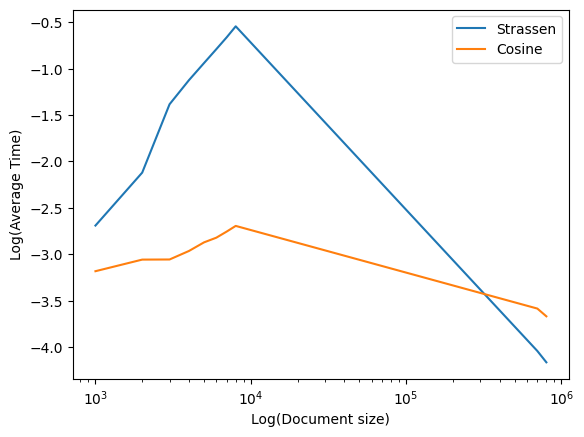

In [ ]:
x = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 700000, 800000]
y_strassen = strassen_all  # Assuming strassen_all is defined
y_cosine = cosine_all  # Assuming cosine_all is defined
x_axis_log=[np.log10(i) for i in x]
y_axis_log_strassen=[np.log10(i) for i in y_strassen]
y_axis_log_cosine=[np.log10(i) for i in y_cosine]
plt.plot(x, y_axis_log_strassen, label='Strassen')
plt.plot(x, y_axis_log_cosine, label='Cosine')

plt.xscale('log')
plt.xlabel('Log(Document size)')
plt.ylabel('Log(Average Time)')
plt.legend()

plt.show()


**Result**


As we can see for a sufficiently large data matrix, the average time is less than cosine similarities'. However, for smaller data matrix this method is not so efficient and the cosine similarity method is more preferrable.

#Refrences



*   "Introduction to Algorithms" by Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein.
*   Bonaccorso, G. (2018). Machine Learning Algorithms: Popular algorithms for data science and machine learning. Packt Publishing Ltd.


*   https://www.tutorialspoint.com/design_and_analysis_of_algorithms/design_and_analysis_of_algorithms_strassens_matrix_multiplication.htm
*   lecture slides


